In [1]:
import pandas as pd
import numpy as np

In [2]:
folder_path = '../data/'
transit_bucket = 'raw_datasets/'

In [ ]:
"""
import pandas as pd

# Load data
df = pd.read_csv('ratings.csv') 

# Check for missing values
print(df.isna().sum())

# Check distribution of ratings 
print(df['rating'].describe()) 

# Check for duplicate rows
print(df.duplicated().sum())

# Check unique users and items
print(df['user_id'].nunique(), df['item_id'].nunique())

# Check density (interactions per user/item)
print(df.groupby(['user_id','item_id'])['rating'].count().describe())

# Sample and plot the rating distribution
df['rating'].sample(1000).plot(kind='hist')

# Check item metadata for consistency 
meta = pd.read_csv('items.csv')
print(meta['name'].isna().sum())
"""

In [3]:
target_bucket = 'yelp/'

files_list = [
    'yelp_academic_dataset_business.json',
    'yelp_academic_dataset_review.json',    # this is the main file and will take the longest to process
    
    # 'yelp_academic_dataset_user.json',
    # 'yelp_academic_dataset_checkin.json',
    # 'yelp_academic_dataset_tip.json',
    # 'yelp_academic_dataset_photo.json'
]

Loaded yelp_academic_dataset_business.json: 10000/150346 records sampled.

Missing Values in yelp_academic_dataset_business.json:
            Count  Percentage
attributes    964        9.64
categories      4        0.04
hours        1596       15.96

Data Types for yelp_academic_dataset_business.json:
business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

Basic Statistics for yelp_academic_dataset_business.json:
                   business_id       name address          city  state  \
count                    10000      10000   10000         10000  10000   
unique                   10000       8757    9452           551     14   
top     TacYUYhU3HpLHF9Rs6fW2w  Starbucks          Philadelphia   

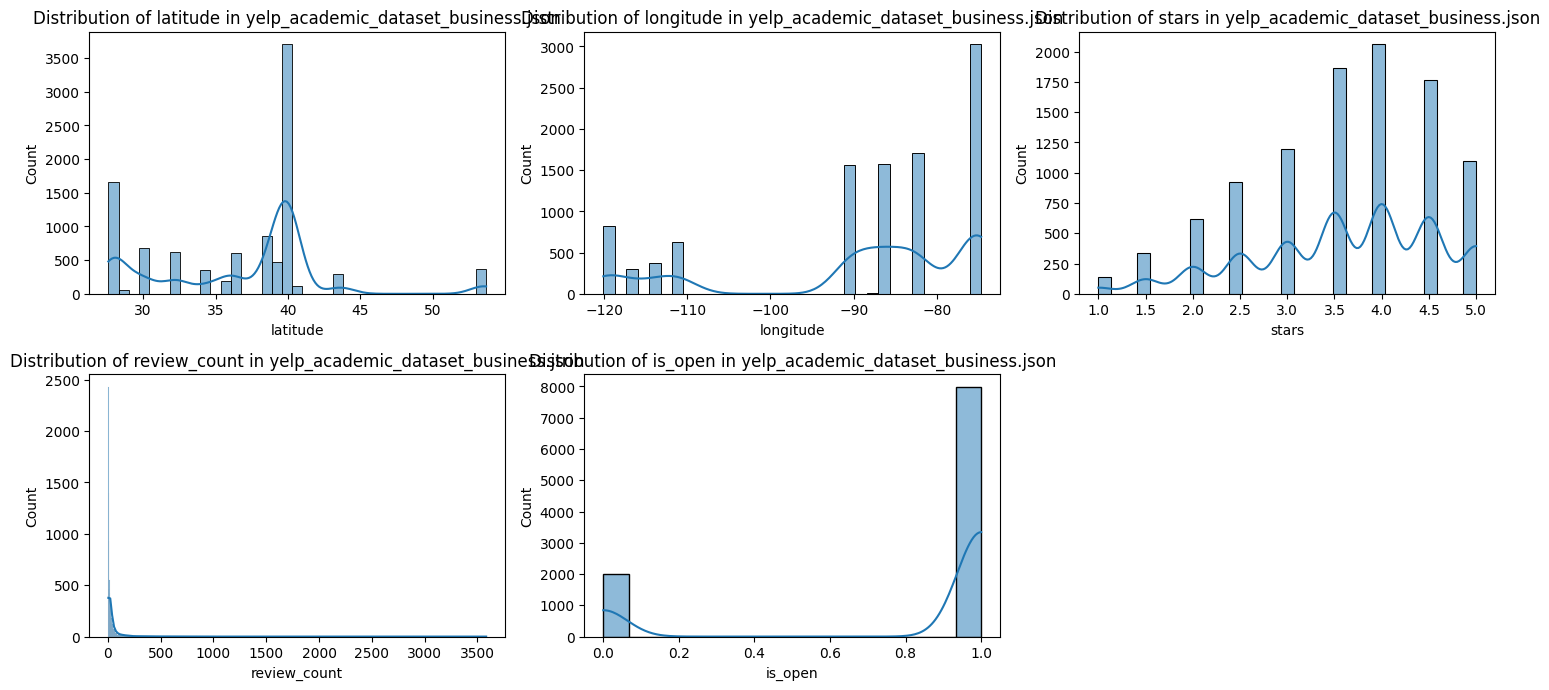

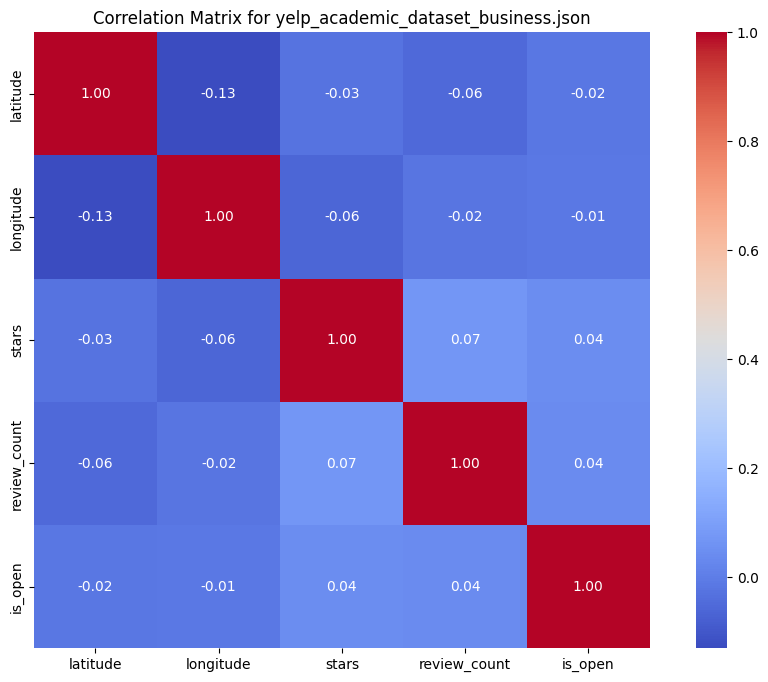

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets with random sampling
def load_datasets(folder_path, transit_bucket, target_bucket, files_list, max_records=None):
    df_list = {}
    for file in files_list:
        try:
            df = pd.read_json(folder_path + transit_bucket + target_bucket + file, lines=True)
            total_records = df.shape[0]
            if max_records is not None:
                df = df.sample(n=min(max_records, total_records), random_state=42)  # Random sampling
            sampled_records = df.shape[0]
            print(f"Loaded {file}: {sampled_records}/{total_records} records sampled.")
            df_list[file] = df
        except Exception as e:
            print(f"Error loading {file}: {e}")
    return df_list

# Check for missing values
def check_missing_values(df, file_name):
    missing_values = df.isnull().sum()
    total_records = df.shape[0]
    missing_percentage = (missing_values / total_records) * 100

    print(f"\nMissing Values in {file_name}:")
    missing_info = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percentage})
    print(missing_info[missing_info['Count'] > 0])
    return missing_info

# Data types and basic statistics
def basic_statistics(df, file_name):
    print(f"\nData Types for {file_name}:")
    print(df.dtypes)
    print(f"\nBasic Statistics for {file_name}:")
    print(df.describe(include='all'))

# Visualize distributions of numerical features
def plot_distributions(df, file_name):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(3, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} in {file_name}')
    plt.tight_layout()
    plt.show()

# Correlation matrix
def plot_correlation_matrix(df, file_name):
    # Filter numeric columns only
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        print(f"No numeric data available for correlation in {file_name}.")
        return

    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation Matrix for {file_name}')
    plt.show()

# Main function to evaluate the datasets
def evaluate_datasets(folder_path, transit_bucket, target_bucket, files_list, max_records=None):
    df_list = load_datasets(folder_path, transit_bucket, target_bucket, files_list, max_records)
    
    for file_name, df in df_list.items():
        if df is not None:
            check_missing_values(df, file_name)
            basic_statistics(df, file_name)
            plot_distributions(df, file_name)
            plot_correlation_matrix(df, file_name)

# Example usage
if __name__ == "__main__":
    folder_path = '../data/'
    transit_bucket = 'raw_datasets/'
    target_bucket = 'yelp/'

    files_list = [
        'yelp_academic_dataset_business.json',
        # 'yelp_academic_dataset_review.json',
        # 'yelp_academic_dataset_user.json',
        # 'yelp_academic_dataset_checkin.json',
        # 'yelp_academic_dataset_tip.json',
        # 'yelp_academic_dataset_photo.json'
    ]

    max_records = 10000  # Set the maximum number of records to sample from each dataset
    evaluate_datasets(folder_path, transit_bucket, target_bucket, files_list, max_records)